In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Working with cancer data first

In [69]:
df = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/asthma_data.csv')
df.head()

,CensusTract,Asthma_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,10.9,10.4,11.4,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,8.8,8.4,9.3,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,10.3,10.0,10.6,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,9.4,9.1,9.8,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.9,9.4,10.5,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

In [70]:
df.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df.set_index('CensusTract', inplace=True)
df.head()

,Asthma_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,10.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,8.8,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,10.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,9.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


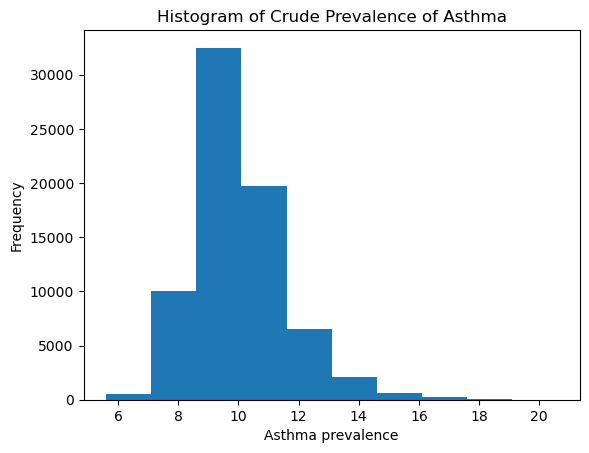

In [71]:
_ = plt.hist(df['Asthma_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Asthma prevalence')
_ = plt.title('Histogram of Crude Prevalence of Asthma')

Visualizing parameters to see any clear correlations.

In [72]:
df.corr()

,Asthma_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Asthma_prevalence,1.000000,-0.028429,0.110788,-0.018982,-0.017102,-0.024781,-0.003949,0.281981,0.005500,0.127922,-0.037394,-0.000535
PM25,-0.028429,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,0.110788,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.018982,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.017102,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.024781,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.003949,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.281981,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,0.005500,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,0.127922,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


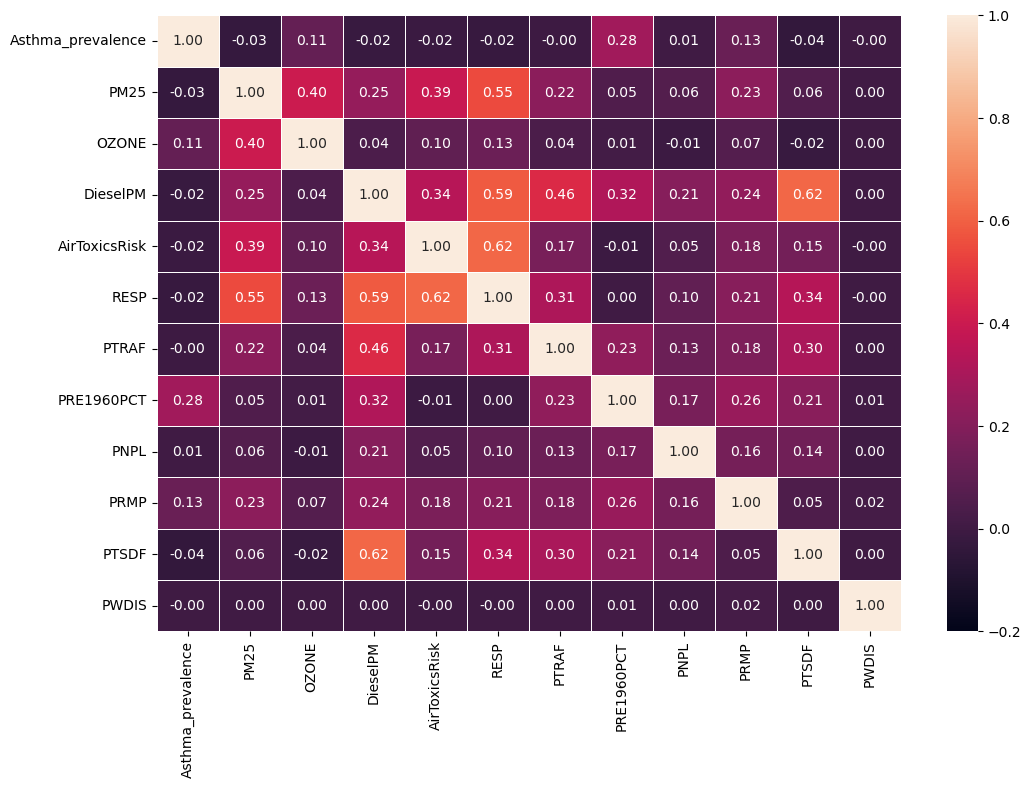

In [73]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only OZONE, PRE1960PCT, and PRMP show a positive correlation to crude prevalence of asthma.

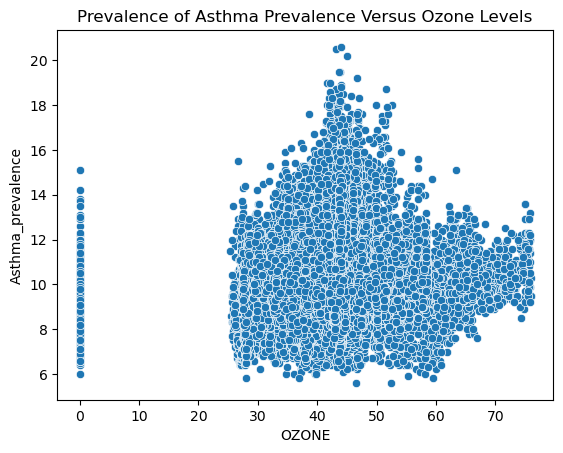

In [74]:
_ = sns.scatterplot(x='OZONE', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Prevalence Versus Ozone Levels')

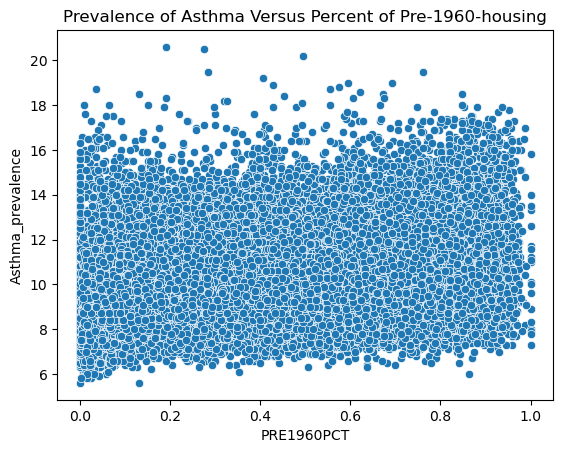

In [75]:
_ = sns.scatterplot(x='PRE1960PCT', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Versus Percent of Pre-1960-housing')

In [76]:
df2 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/cancer_data.csv')
df2.head()

,CensusTract,Cancer_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.0,4.8,5.2,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,8.0,7.5,8.4,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,6.2,6.0,6.3,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.1,5.9,6.3,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.1,6.7,7.5,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [77]:
df2.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth', 'CensusTract'], axis=1, inplace=True)
df2.head()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

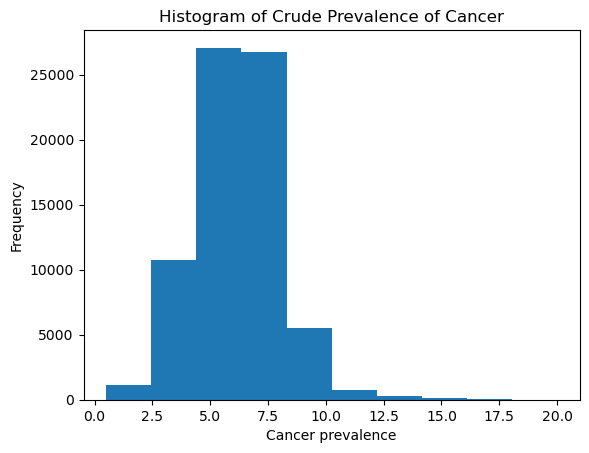

In [78]:
_ = plt.hist(df2['Cancer_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Cancer prevalence')
_ = plt.title('Histogram of Crude Prevalence of Cancer')

In [79]:
df2.corr()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Cancer_prevalence,1.000000,-0.219611,-0.106416,-0.317580,-0.199981,-0.306677,-0.246381,-0.062947,-0.119024,-0.220501,-0.151194,-0.001731
PM25,-0.219611,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.106416,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.317580,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.199981,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.306677,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.246381,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,-0.062947,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.119024,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,-0.220501,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


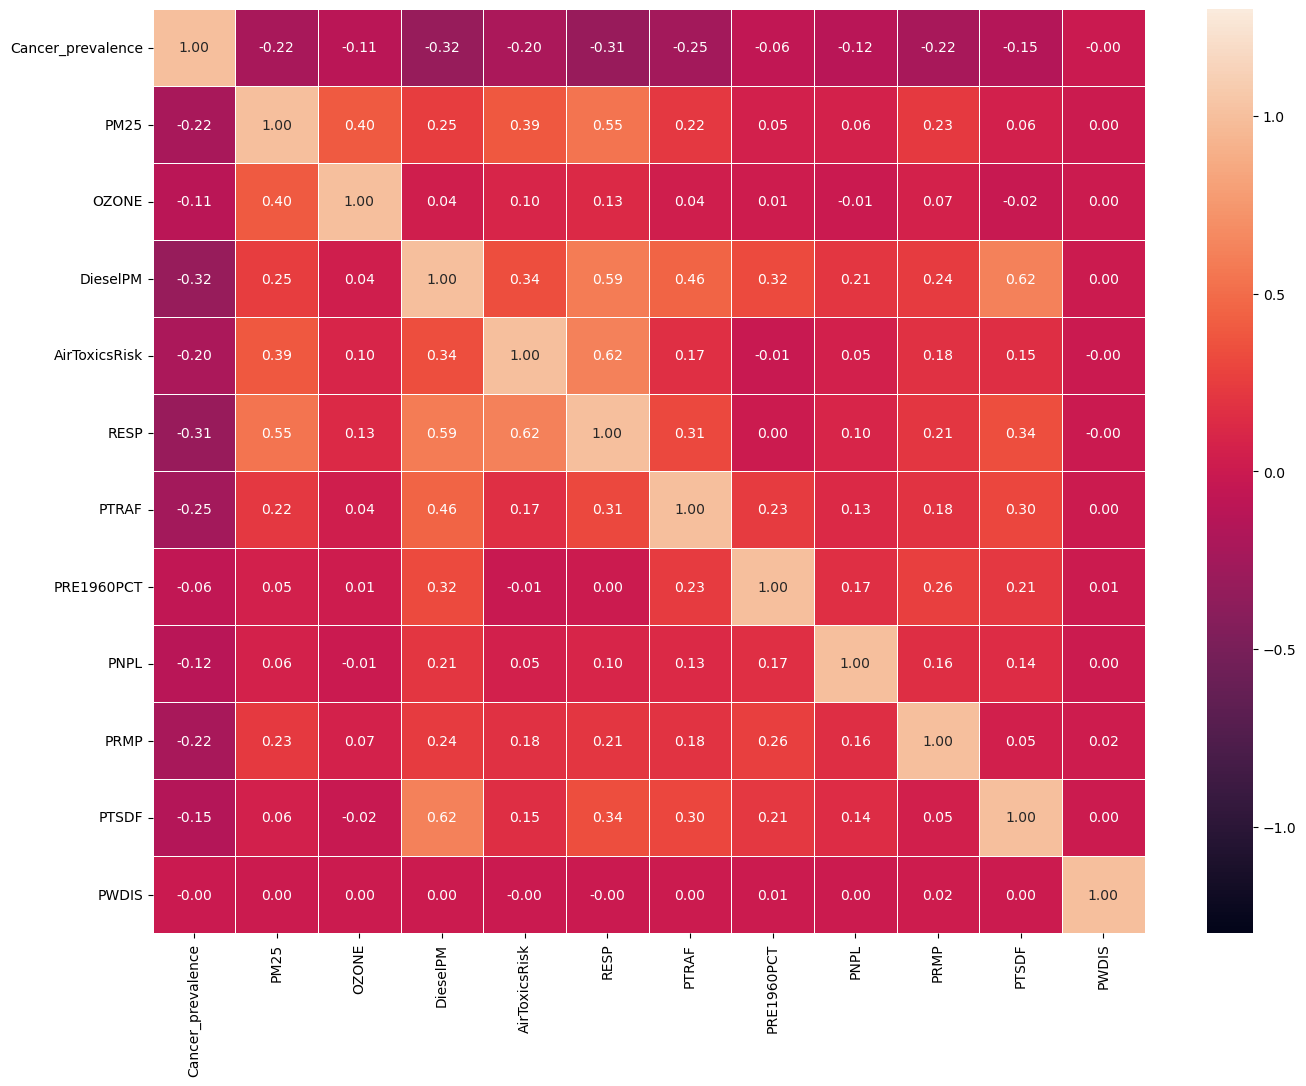

In [80]:
f, ax = plt.subplots(figsize=(16, 12))
_ = sns.heatmap(df2.corr(), vmin=-1.3, vmax=1.3, annot=True, fmt=".2f", linewidth=.5)

None of these environmental factors are positively correlated with cancer.

b

Now kidney disease

In [81]:
df3 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/kidney_data.csv')
df3.head()

,CensusTract,Kidney_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,3.1,2.9,3.3,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,2.9,2.7,3.2,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,3.3,3.2,3.4,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,2.7,2.6,2.9,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,3.3,3.0,3.6,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [82]:
df3.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df3.set_index('CensusTract', inplace=True)
df3.head()

,Kidney_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,3.1,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,2.9,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,3.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,2.7,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,3.3,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


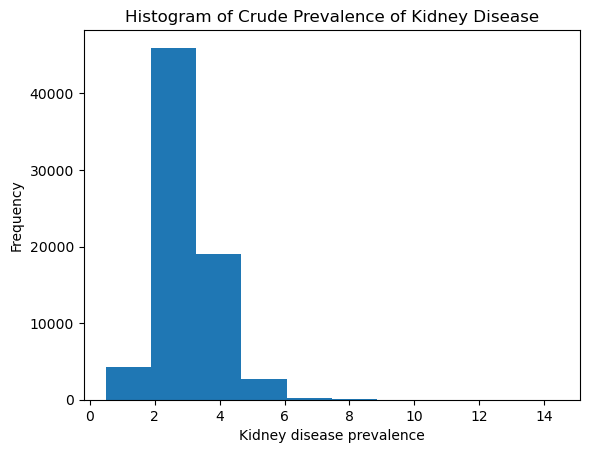

In [83]:
_ = plt.hist(df3['Kidney_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Kidney disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of Kidney Disease')

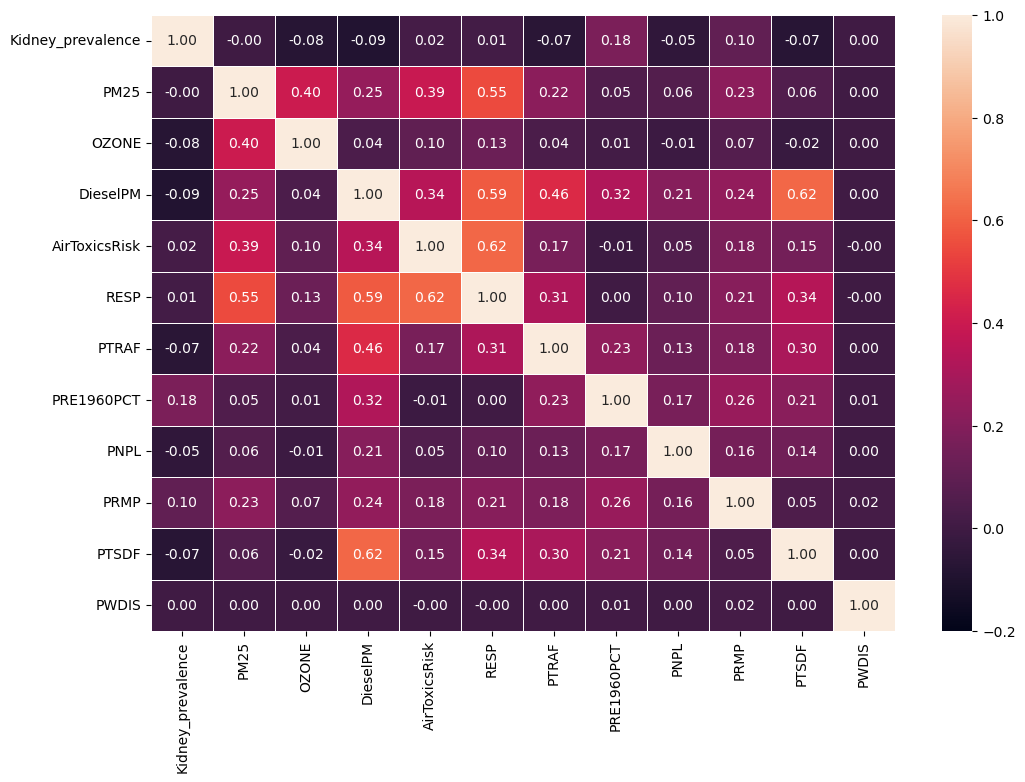

In [84]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df3.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only PRE1960PCT, and PRMP show a positive correlation of more than .02 to crude prevalence of Kidney problems.

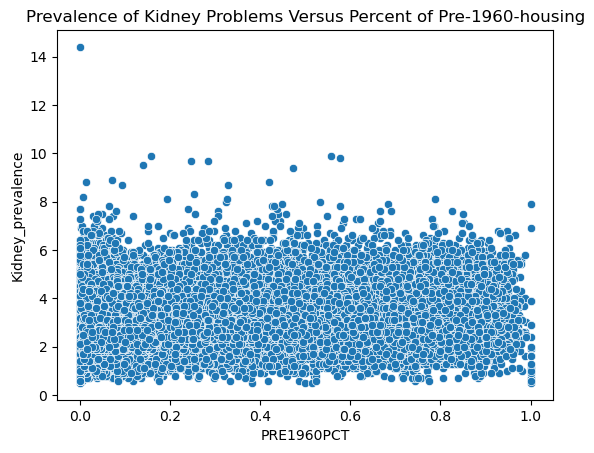

In [85]:
 _ = sns.scatterplot(x='PRE1960PCT', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus Percent of Pre-1960-housing')

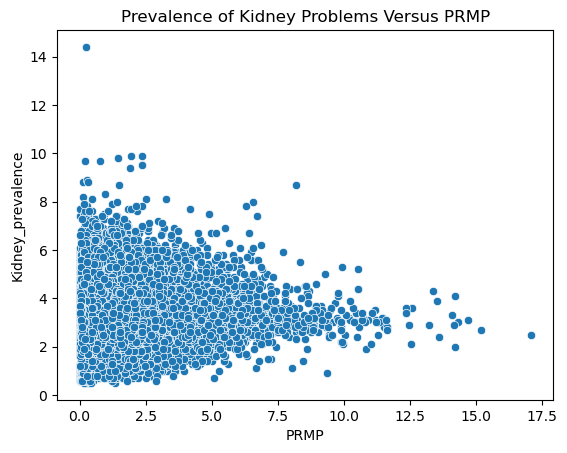

In [86]:
_ = sns.scatterplot(x='PRMP', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus PRMP')

No reasonable correlation

b

Now COPD

In [87]:
df4 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/copd_data.csv')
df4.head()

,CensusTract,COPD_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,7.6,6.8,8.5,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.2,6.0,8.6,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,9.2,8.5,9.9,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,7.8,7.1,8.6,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.8,8.6,11.2,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [88]:
df4.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df4.set_index('CensusTract', inplace=True)
df4.head()

,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,7.6,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.2,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,9.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,7.8,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.8,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


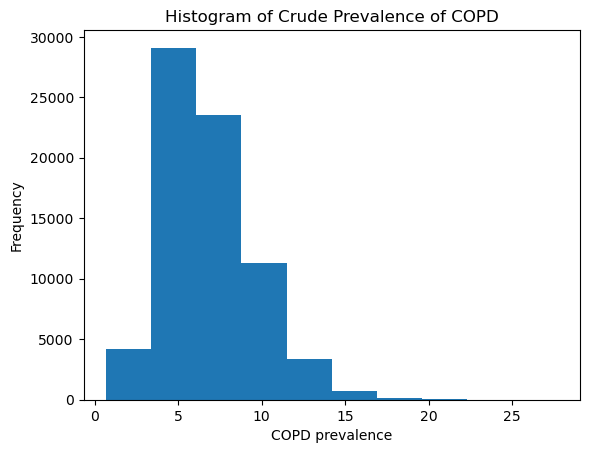

In [89]:
_ = plt.hist(df4['COPD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('COPD prevalence')
_ = plt.title('Histogram of Crude Prevalence of COPD')

In [90]:
df4.corr()

,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
COPD_prevalence,1.000000,-0.039750,-0.078967,-0.256896,-0.054721,-0.097198,-0.180631,0.106012,-0.095000,0.031072,-0.147708,-0.002698
PM25,-0.039750,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.078967,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.256896,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.054721,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.097198,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.180631,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.106012,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.095000,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,0.031072,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


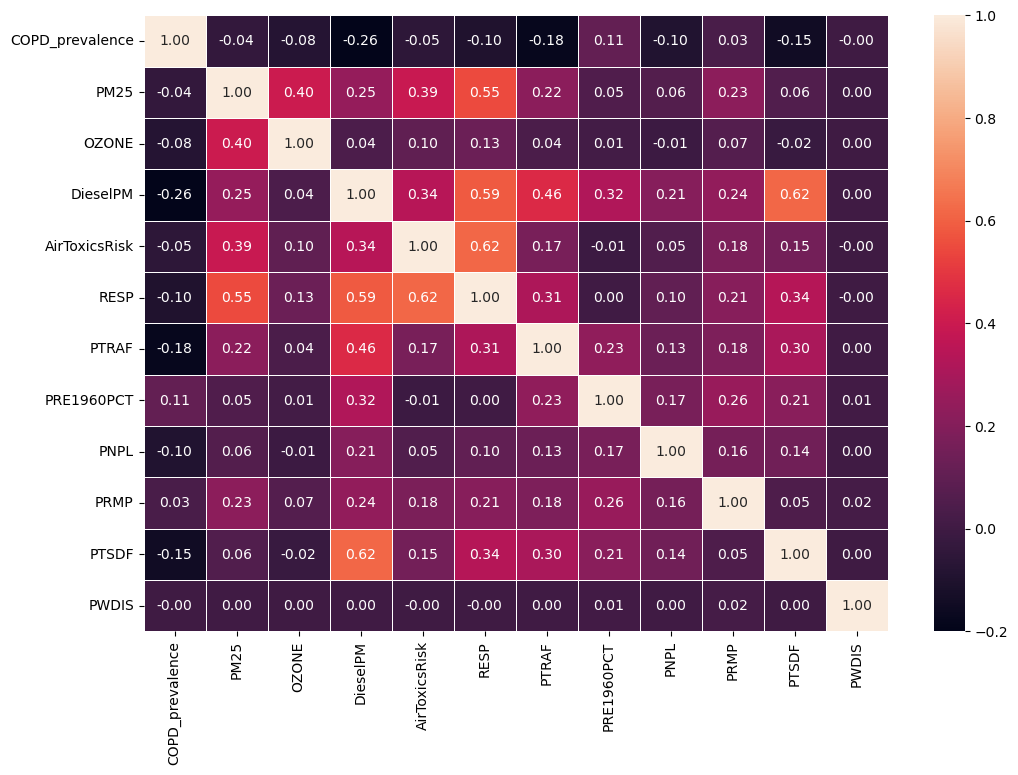

In [91]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df4.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only PRE1960PCT and PRMP show a positive correlation to crude prevalence of COPD.

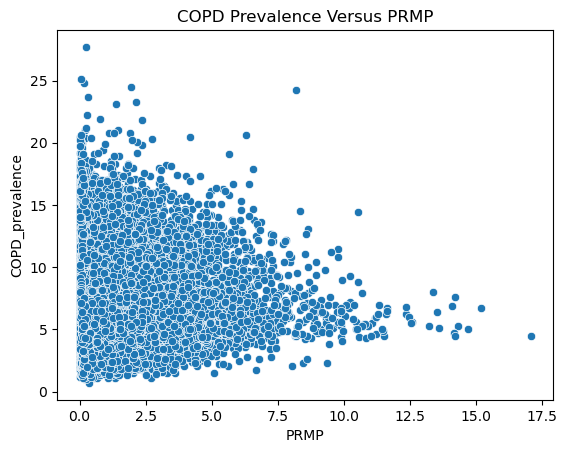

In [92]:
_ = sns.scatterplot(x='PRMP', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus PRMP')

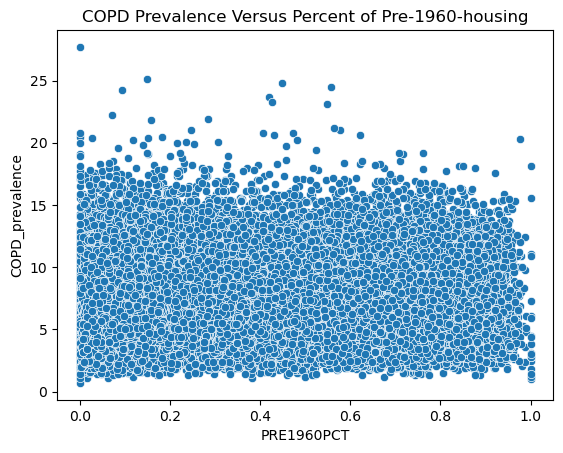

In [93]:
_ = sns.scatterplot(x='PRE1960PCT', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus Percent of Pre-1960-housing')

No reasonable correlations for COPD prevalence either

b

Now CHD

In [94]:
df5 = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/CHD_data.csv')
df5.head()

,CensusTract,CHD_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.9,5.5,6.3,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.1,6.4,7.9,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,7.3,7.0,7.7,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.4,6.0,6.8,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.9,7.2,8.6,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [95]:
df5.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df5.set_index('CensusTract', inplace=True)
df5.head()

,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,5.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.1,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,7.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,6.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,7.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


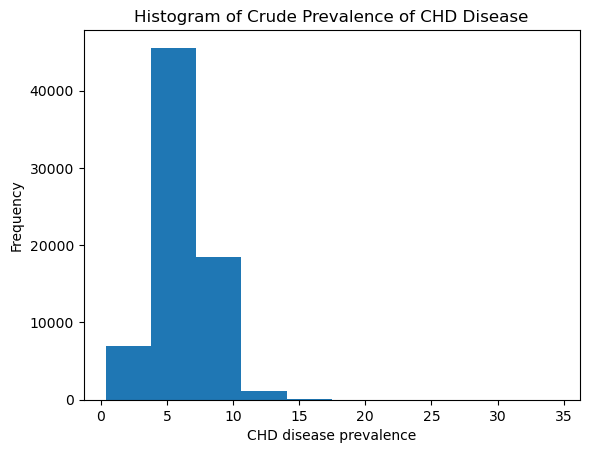

In [96]:
_ = plt.hist(df5['CHD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('CHD disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of CHD Disease')

Visualizing parameters to see any clear correlations.

In [97]:
df5.corr()

,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CHD_prevalence,1.000000,-0.093471,-0.112446,-0.274925,-0.089541,-0.153073,-0.193048,0.082332,-0.104218,-0.021182,-0.144604,0.001107
PM25,-0.093471,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.112446,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.274925,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.089541,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.153073,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.193048,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.082332,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.104218,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,-0.021182,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


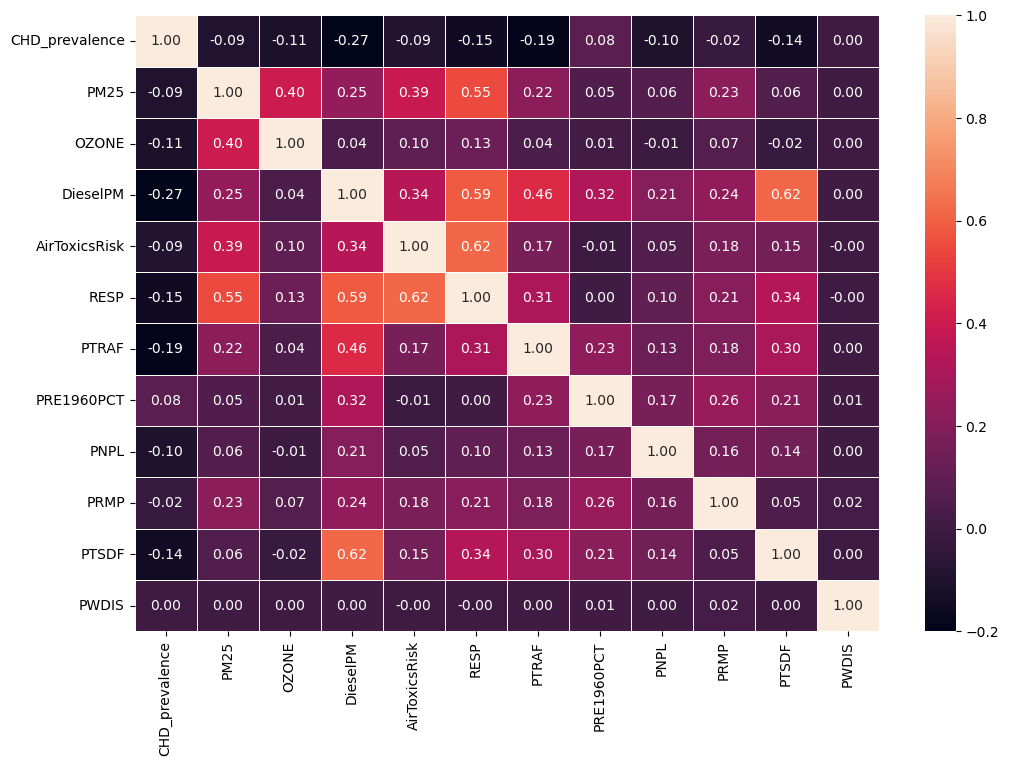

In [98]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df5.corr(), vmin=-.2, vmax=1, annot=True, fmt=".2f", linewidth=.5)

Only PRE1960PCT shows a positive correlation to crude prevalence of CHD.

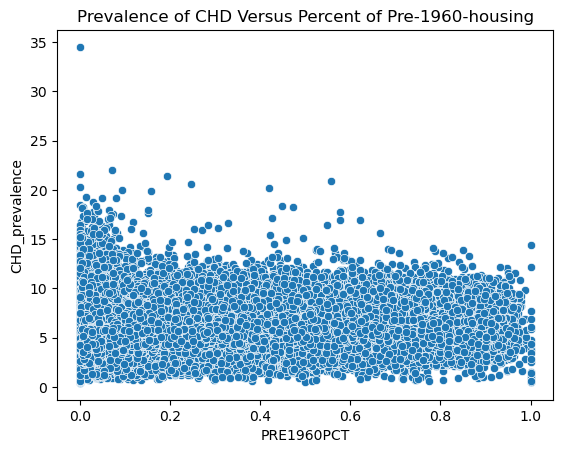

In [99]:
_ = sns.scatterplot(x='PRE1960PCT', y='CHD_prevalence', data=df5)
_ = _.set_title('Prevalence of CHD Versus Percent of Pre-1960-housing')

No reasonable correlation